## Casestudy on Unsupervised Learning

## Importing libraries needed for dataset analysis
We will first import some useful Python libraries like Pandas, Seaborn, Matplotlib and SKlearn for performing complex computational tasks. 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

## Importing Dataset:
These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines

In [2]:
df = pd.read_csv(r"F:\ICTAK\Case study 4 unsupervised learning\Wine_clust .csv",header = None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
1,14.23,1.71,2.43,15.6,127,2.8,3.06,0.28,2.29,5.64,1.04,3.92,1065
2,13.2,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.4,1050
3,13.16,2.36,2.67,18.6,101,2.8,3.24,0.3,2.81,5.68,1.03,3.17,1185
4,14.37,1.95,2.5,16.8,113,3.85,3.49,0.24,2.18,7.8,0.86,3.45,1480


In [3]:
df.drop(0,axis =0,inplace = True)

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
1,14.23,1.71,2.43,15.6,127,2.8,3.06,0.28,2.29,5.64,1.04,3.92,1065
2,13.2,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.4,1050
3,13.16,2.36,2.67,18.6,101,2.8,3.24,0.3,2.81,5.68,1.03,3.17,1185
4,14.37,1.95,2.5,16.8,113,3.85,3.49,0.24,2.18,7.8,0.86,3.45,1480
5,13.24,2.59,2.87,21,118,2.8,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
df.shape

(178, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 1 to 178
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       178 non-null    object
 1   1       178 non-null    object
 2   2       178 non-null    object
 3   3       178 non-null    object
 4   4       178 non-null    object
 5   5       178 non-null    object
 6   6       178 non-null    object
 7   7       178 non-null    object
 8   8       178 non-null    object
 9   9       178 non-null    object
 10  10      178 non-null    object
 11  11      178 non-null    object
 12  12      178 non-null    object
dtypes: object(13)
memory usage: 18.2+ KB


## In this dataset ,we have no null values and all columns contains object type

## Scaling the Data:
Data is scaled using StandardScaler 

In [7]:
scaler =StandardScaler()
 
features =scaler.fit(df)
features =features.transform(df)
 
# Convert to pandas Dataframe
scaled_df =pd.DataFrame(features,columns=df.columns)
# Print the scaled data
scaled_df.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242


## In general, K-Means requires unlabeled data in order to run. 

So, taking data without labels to perform K-means clustering.



In [8]:
X = scaled_df.values

## Elbow Method
The elbow Method is used to determine the number of clusters

C:\Users\WELCOME\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\WELCOME\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\WELCOME\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\WELCOME\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the e

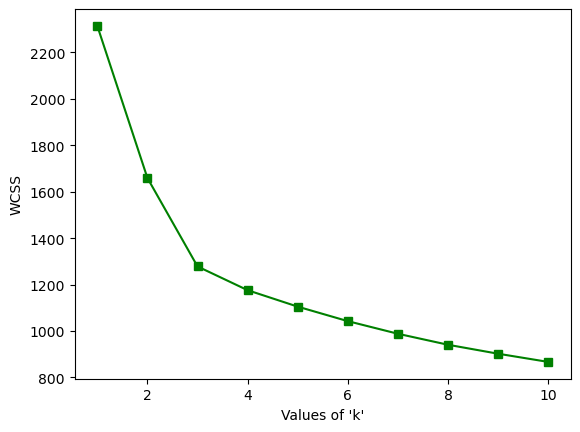

In [9]:
wcss = {}
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss[i] = kmeans.inertia_
     
plt.plot(wcss.keys(), wcss.values(), 'gs-')
plt.xlabel("Values of 'k'")
plt.ylabel('WCSS')
plt.show()

## As we can see from the above graph that there is turning like an elbow at k=3. So, we can say that the right number of cluster for the given datasets is 3.

## Implementing K-Means:
Let’s perform the K-Means clustering for n_clusters=3.

In [10]:
kmeans=KMeans(n_clusters=3)
kmeans.fit(X)

C:\Users\WELCOME\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\WELCOME\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

## For each cluster, there are values of cluster centers according to the number of columns present in the data.

In [11]:

kmeans.cluster_centers_

array([[ 0.16490746,  0.87154706,  0.18689833,  0.52436746, -0.07547277,
        -0.97933029, -1.21524764,  0.72606354, -0.77970639,  0.94153874,
        -1.16478865, -1.29241163, -0.40708796],
       [ 0.83523208, -0.30380968,  0.36470604, -0.61019129,  0.5775868 ,
         0.88523736,  0.97781956, -0.56208965,  0.58028658,  0.17106348,
         0.47398365,  0.77924711,  1.12518529],
       [-0.92607185, -0.39404154, -0.49451676,  0.17060184, -0.49171185,
        -0.07598265,  0.02081257, -0.03353357,  0.0582655 , -0.90191402,
         0.46180361,  0.27076419, -0.75384618]])

## labels_ Index of the cluster each sample belongs to

In [12]:
labels =kmeans.labels_

## Apply Dimensionality Reduction Technique PCA
Principal Component Analysis is a technique that transforms high-dimensions data into lower-dimension while retaining as much information as possible.

It is used to interpret and visualize data. 
The number of variables decreases, which simplifies further analysis.
We can then view the PCA components_, i.e. the principal axes in the feature space, which represent the directions of maximum variance in the dataset. These components are sorted by explained_variance_.

Minimize the dataset from 15 features to 2 features using principal component analysis (PCA).

In [13]:
pca=PCA(n_components=2)
 
reduced_X=pd.DataFrame(data=pca.fit_transform(X),columns=['PCA1','PCA2'])
 
#Reduced Features
reduced_X.head()

,PCA1,PCA2
0,3.316751,-1.443463
1,2.209465,0.333393
2,2.516740,-1.031151
3,3.757066,-2.756372
4,1.008908,-0.869831


## Reducing centers:
Reducing the cluster centers using PCA.

In [14]:
centers=pca.transform(kmeans.cluster_centers_)
 
# reduced centers
centers

array([[-2.72003575, -1.12565126],
       [ 2.2761936 , -0.93205403],
       [-0.03695661,  1.77223945]])

In [15]:
pca1 = PCA(n_components =10)
pca1.fit(scaled_df)
X_pca1 = pca1.transform(scaled_df)

In [16]:
import numpy as np
np.cumsum(pca1.explained_variance_ratio_)

array([0.36198848, 0.55406338, 0.66529969, 0.73598999, 0.80162293,
       0.85098116, 0.89336795, 0.92017544, 0.94239698, 0.96169717])

## Represent the cluster plot based on PCA1 and PCA2. Differentiate clusters by passing a color parameter as c=kmeans.labels_

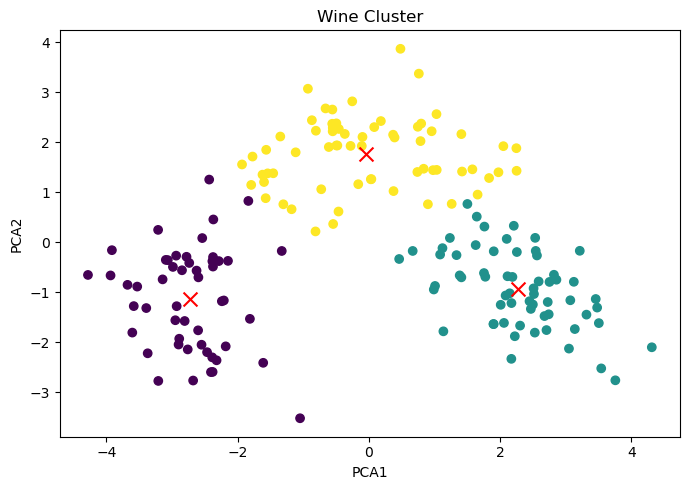

In [17]:
plt.figure(figsize=(7,5))
 
# Scatter plot
plt.scatter(reduced_X['PCA1'],reduced_X['PCA2'],c=kmeans.labels_)
plt.scatter(centers[:,0],centers[:,1],marker='x',s=100,c='red')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Wine Cluster')
plt.tight_layout()

## Effect of PCA1 & PCA2 on Clusters:
If we really want to reduce the size of the dataset, the best number of principal components is much less than the number of variables in the original dataset.

In [18]:
pca.components_

array([[ 0.1443294 , -0.24518758, -0.00205106, -0.23932041,  0.14199204,
         0.39466085,  0.4229343 , -0.2985331 ,  0.31342949, -0.0886167 ,
         0.29671456,  0.37616741,  0.28675223],
       [-0.48365155, -0.22493093, -0.31606881,  0.0105905 , -0.299634  ,
        -0.06503951,  0.00335981, -0.02877949, -0.03930172, -0.52999567,
         0.27923515,  0.16449619, -0.36490283]])

## plot dendrogram to identify clusters

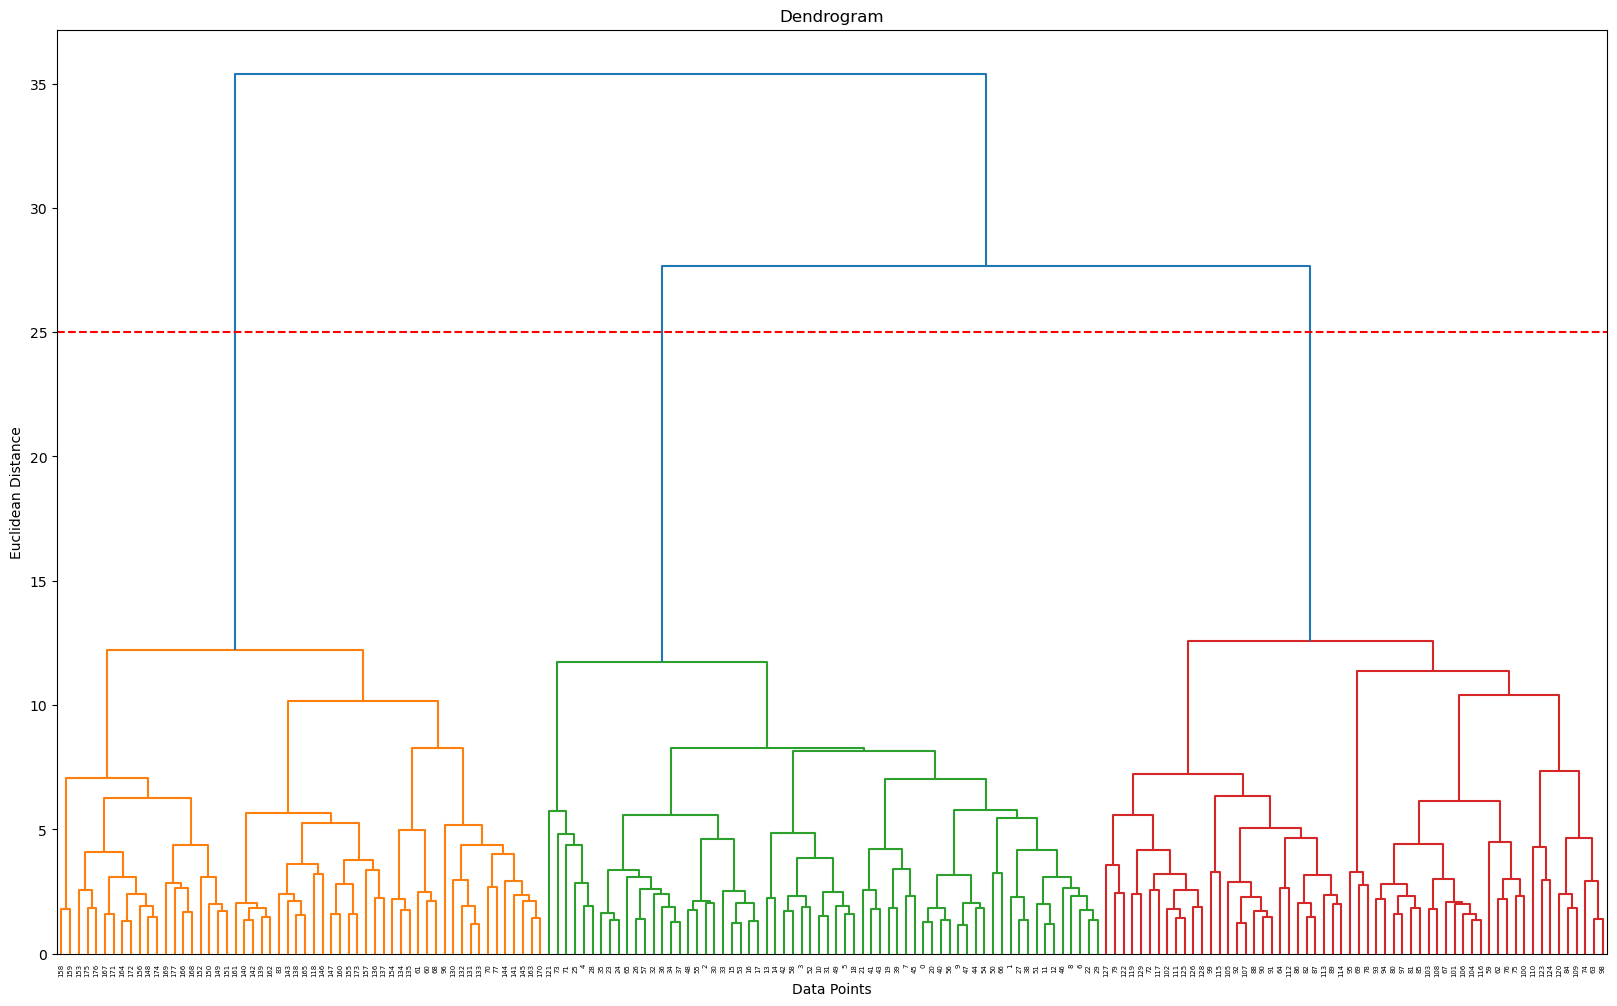

In [19]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize = (20,12))
dendrogram = sch.dendrogram(sch.linkage(scaled_df,method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.axhline(y=25, color = 'r', linestyle = '--')

## Above this dendrogram,longest distance cuts the three intersection lines,therefore cluster = 3

## Agglomerative Clustering

In [20]:
from sklearn.cluster import AgglomerativeClustering
ahc = AgglomerativeClustering(n_clusters=3 ,affinity ='euclidean',linkage = 'ward')
y_ahc = ahc.fit_predict(scaled_df)

C:\Users\WELCOME\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [21]:
y_ahc

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 0, 0, 0, 2,
       2, 0, 1, 0, 1, 2, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

## Silhuette Score

In [22]:
from sklearn.metrics import silhouette_score
sil_ahc = silhouette_score(scaled_df,y_ahc)
y_ahc1 = ahc.fit_predict(scaled_df)
sil_ahc

C:\Users\WELCOME\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


0.2774439826952265

In [23]:
kmeans = KMeans(n_clusters = 3,init = 'k-means++', random_state = 42)
y_means =kmeans.fit_predict(X)

C:\Users\WELCOME\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\WELCOME\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [24]:
y_means

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [25]:
silhouette_avg = silhouette_score(X, labels)
print("The silhouette score is:", silhouette_avg)

The silhouette score is: 0.2848589191898987


In [26]:
cluster_range = range(2,10)

In [27]:
silhouette_scores = []

for num_clusters in cluster_range:
    # Fit the K-means model
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(X)
    
    # Compute the silhouette score
    labels = kmeans.labels_
    score = silhouette_score(X, labels)
    
    # Append the score to the list
    silhouette_scores.append(score)

C:\Users\WELCOME\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\WELCOME\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\WELCOME\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\WELCOME\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the e

In [28]:
silhouette_scores

[0.25931695553182543,
 0.2848589191898987,
 0.24867713814255363,
 0.23684865340788136,
 0.1347621229401855,
 0.18928166928767082,
 0.1524263597489743,
 0.13325382118578832]

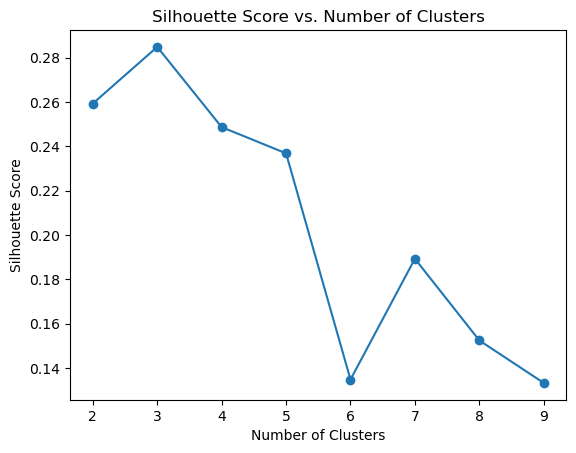

In [29]:
# Plot the silhouette scores
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.show()

## DBScan Clustering

In [30]:
from sklearn.cluster import DBSCAN

# Assuming you have your data in the variable 'X'
dbscan = DBSCAN(eps=3, min_samples=5)  # Set epsilon and min_samples according to your data
dbscan_labels = dbscan.fit_predict(X)
dbscan_labels

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0, -1,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0, -1,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0], dtype=int64)

In [31]:
db_sil = silhouette_score(X,labels)

In [32]:
db_sil

0.13325382118578832

## Represent the cluster plot based on PCA1 and PCA2. Differentiate clusters by passing a color parameter as c=dbscan.labels_

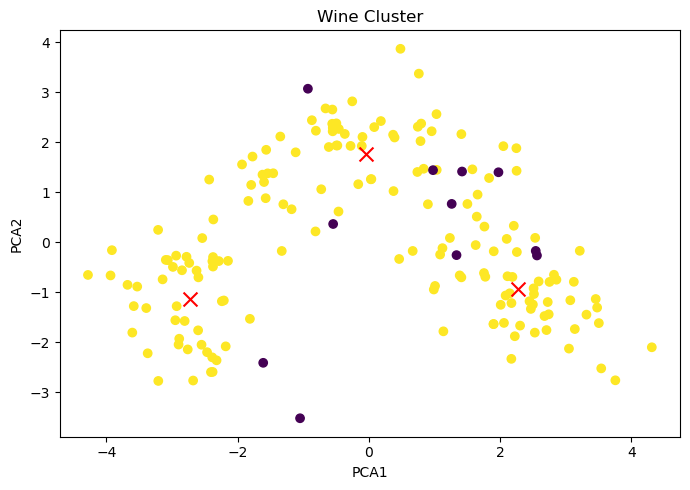

In [33]:
plt.figure(figsize=(7,5))
 
# Scatter plot
plt.scatter(reduced_X['PCA1'],reduced_X['PCA2'],c=dbscan.labels_)
plt.scatter(centers[:,0],centers[:,1],marker='x',s=100,c='red')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Wine Cluster')
plt.tight_layout()

## Represent the cluster plot based on PCA1 and PCA2. Differentiate clusters by passing a color parameter as c=agglomerative clustering.labels_

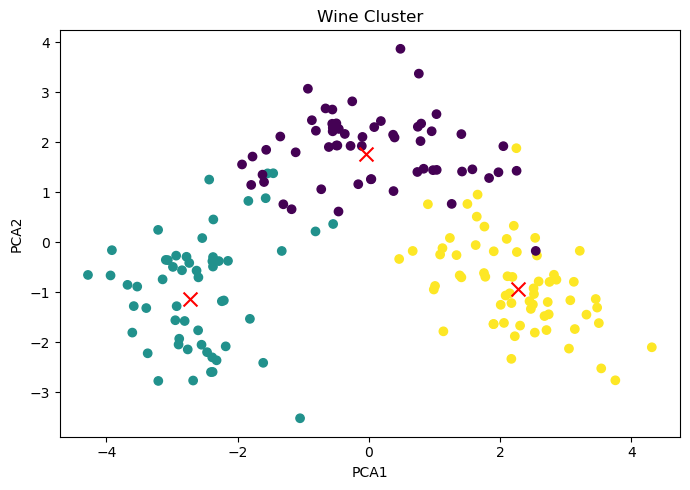

In [34]:
plt.figure(figsize=(7,5))
 
# Scatter plot
plt.scatter(reduced_X['PCA1'],reduced_X['PCA2'],c=ahc.labels_)
plt.scatter(centers[:,0],centers[:,1],marker='x',s=100,c='red')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Wine Cluster')
plt.tight_layout()